## CellPhoneDB Interaction

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

Version,Release date,v4.1.0,2023-03-09


In [ ]:
# -- Version of the databse
cpdb_version = 'v4.1.0'

# -- Path where the input files to generate the database are located
cpdb_target_dir = os.path.join('F://cpdb_tutorial/db/', cpdb_version)

In [ ]:
from cellphonedb.utils import db_utils

db_utils.download_database(cpdb_target_dir, cpdb_version)

Downloaded cellphonedb.zip into F://cpdb_tutorial/v4.1.0
Downloaded complex_input.csv into F://cpdb_tutorial/v4.1.0
Downloaded gene_input.csv into F://cpdb_tutorial/v4.1.0
Downloaded interaction_input.csv into F://cpdb_tutorial/v4.1.0
Downloaded protein_input.csv into F://cpdb_tutorial/v4.1.0
Downloaded uniprot_synonyms.tsv into F://cpdb_tutorial/v4.1.0\sources


In [ ]:
pd.set_option('display.max_columns', 100)
os.chdir('F://cpdb_tutorial/')

In [ ]:
adata_IEL = sc.read_h5ad('F:/IEL_ultimate_annotated_refined.h5ad')

In [ ]:
adata_IEC= sc.read_h5ad('IEC_annotated.h5ad')

In [ ]:
adata_IEC.obs['celltype'] = adata_IEC.obs['celltype_highres']

In [ ]:
adata_IELIEC = adata_IEL.concatenate(adata_IEC,batch_key = 'cell_source', batch_categories=['IEL','IEC'],join = 'outer',fill_value=0)

In [ ]:
meta = pd.DataFrame(index=adata_IELIEC.obs_names)
meta['cell_type'] = adata_IELIEC.obs['celltype']
meta.to_csv('meta.tsv', sep='\t')

In [ ]:
set(meta['cell_type'])

{'Colonocytes',
 'Enteroendocrine Cells',
 'Goblet Cells',
 'Intestinal Epithelial Cells',
 'Intestinal Stem Cells',
 'M Cells',
 'TCRab CD4 FOXP3+ Treg',
 'TCRab CD4 TEM/TRM',
 'TCRab CD4 TRM',
 'TCRab CD8ab TRM',
 'TCRgd TRM',
 'Transit Amplifying Cells'}

In [ ]:
adata_IELIEC.obs = pd.DataFrame(adata_IELIEC.obs['celltype'])
del adata_IELIEC.var

In [ ]:
adata_IELIEC.write_h5ad('adata_IELIEC.h5ad')

In [ ]:
cpdb_file_path = 'db/v4.1.0/cellphonedb.zip'
meta_file_path = 'meta.tsv'
counts_file_path = 'adata_IELIEC.h5ad'
out_path = 'results/IELIEC'

In [ ]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.3,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 6,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = '_test'                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
adata_IELIEC.h5ad
meta.tsv
[ ][CORE][30/10/23-09:25:52][INFO] [Cluster Statistical Analysis] Threshold:0.3 Iterations:1000 Debug-seed:42 Threads:6 Precision:3
[ ][CORE][30/10/23-09:25:52][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][30/10/23-09:25:54][INFO] Running Real Analysis
[ ][CORE][30/10/23-09:25:54][INFO] Running Statistical Analysis


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.38it/s]

[ ][CORE][30/10/23-09:27:15][INFO] Building Pvalues result


[ ][CORE][30/10/23-09:27:15][INFO] Building results
Saved deconvoluted to results/IELIEC\statistical_analysis_deconvoluted__test.txt
Saved means to results/IELIEC\statistical_analysis_means__test.txt
Saved pvalues to results/IELIEC\statistical_analysis_pvalues__test.txt
Saved significant_means to results/IELIEC\statistical_analysis_significant_means__test.txt


In [ ]:
interact = significant_means.iloc[:,12:]

In [ ]:
IEC_IEL_interaction_names =  [ f"{a}|{b}" for a in list(set(adata_IEC.obs['celltype'])) for b in list(set(adata_IEL.obs['celltype']))]

In [ ]:
IEC_IEL_interaction_names

['Intestinal Stem Cells|TCRab CD4 FOXP3+ Treg',
 'Intestinal Stem Cells|TCRab CD4 TRM',
 'Intestinal Stem Cells|TCRab CD8ab TRM',
 'Intestinal Stem Cells|TCRab CD4 TEM/TRM',
 'Intestinal Stem Cells|TCRgd TRM',
 'Transit Amplifying Cells|TCRab CD4 FOXP3+ Treg',
 'Transit Amplifying Cells|TCRab CD4 TRM',
 'Transit Amplifying Cells|TCRab CD8ab TRM',
 'Transit Amplifying Cells|TCRab CD4 TEM/TRM',
 'Transit Amplifying Cells|TCRgd TRM',
 'Goblet Cells|TCRab CD4 FOXP3+ Treg',
 'Goblet Cells|TCRab CD4 TRM',
 'Goblet Cells|TCRab CD8ab TRM',
 'Goblet Cells|TCRab CD4 TEM/TRM',
 'Goblet Cells|TCRgd TRM',
 'M Cells|TCRab CD4 FOXP3+ Treg',
 'M Cells|TCRab CD4 TRM',
 'M Cells|TCRab CD8ab TRM',
 'M Cells|TCRab CD4 TEM/TRM',
 'M Cells|TCRgd TRM',
 'Intestinal Epithelial Cells|TCRab CD4 FOXP3+ Treg',
 'Intestinal Epithelial Cells|TCRab CD4 TRM',
 'Intestinal Epithelial Cells|TCRab CD8ab TRM',
 'Intestinal Epithelial Cells|TCRab CD4 TEM/TRM',
 'Intestinal Epithelial Cells|TCRgd TRM',
 'Enteroendocrine Ce

In [ ]:
interact_lymph_endo = interact.loc[:,[ i for i in interact.columns if i in IEC_IEL_interaction_names ]].dropna(how='all').fillna(0)
interact_lymph_endo.index = significant_means.loc[interact_lymph_endo.index,'interacting_pair']
interact_lymph_endo = interact_lymph_endo.loc[interact_lymph_endo.sum(axis = 1).sort_values().index.tolist(),:]
interact_lymph_endo = interact_lymph_endo.loc[:,interact_lymph_endo.sum(axis = 0).sort_values().index.tolist()]
interact_lymph_endo = np.log(interact_lymph_endo+1)

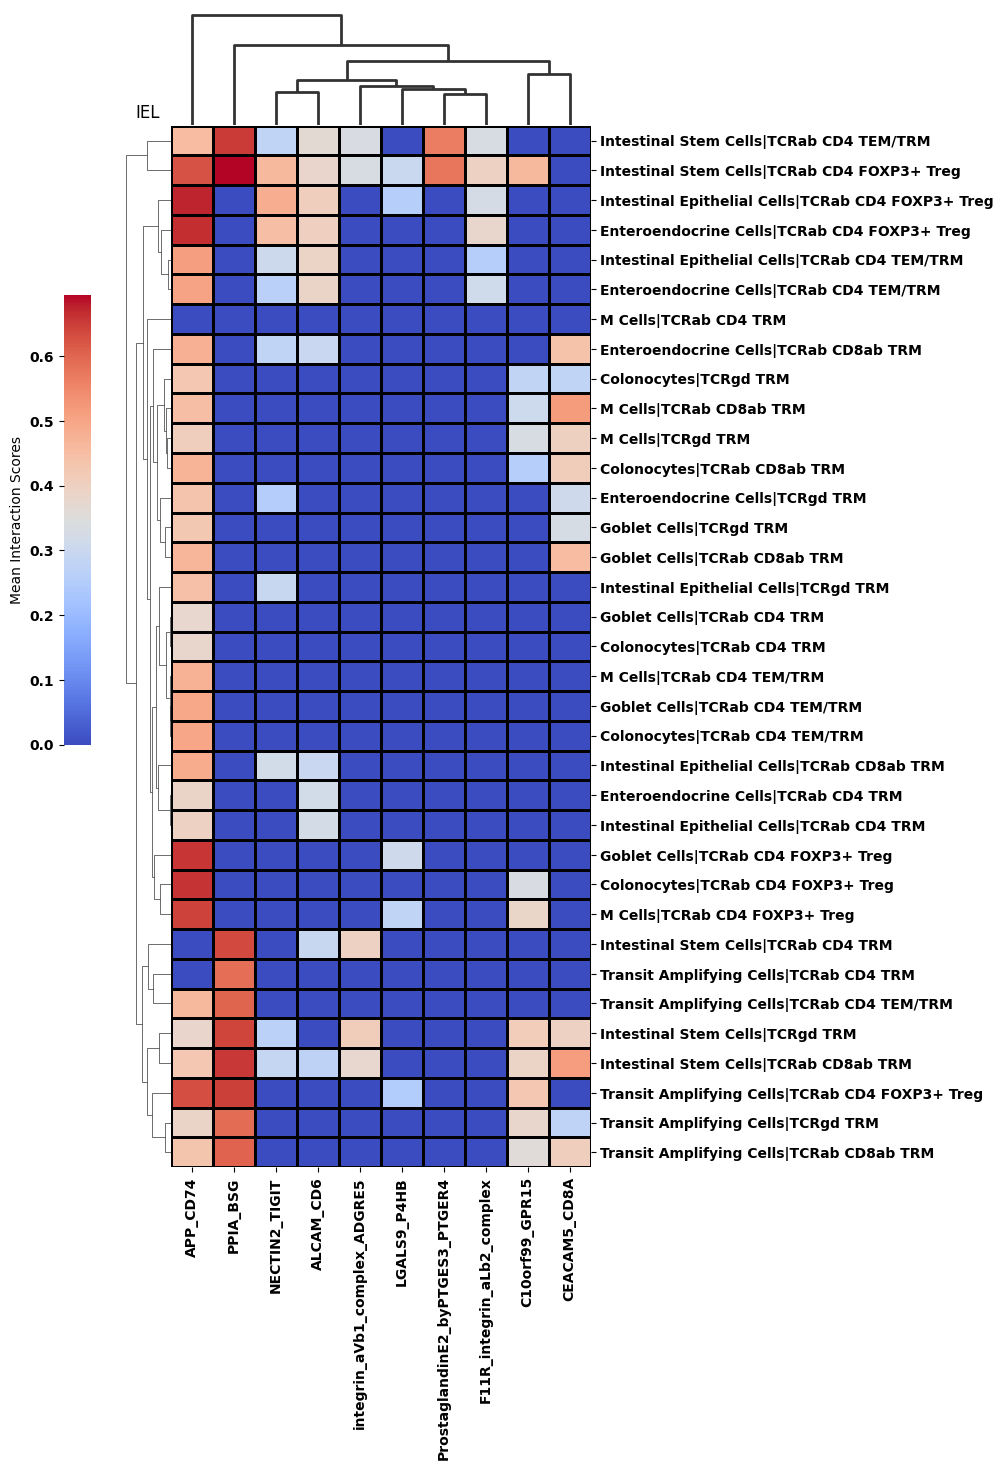

In [ ]:

plt.rcParams.update({'font.size': 10, 'font.weight': 'heavy','axes.linewidth':0.5})
#plt.rcParams.update(plt.rcParamsDefault)
kwargs = {'cmap': 'coolwarm'}
clustergrid = sns.clustermap(interact_lymph_endo.T,figsize = (9,15),linewidths=2,
               linecolor = 'k',dendrogram_ratio = 0.1, colors_ratio = 0.5, 
               row_cluster = True,cbar_kws={'label': 'Mean Interaction Scores','location':"left"},
               **kwargs)
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([-0.05, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')
axs[0].set_title('IEL')

plt.savefig('heatmap_IEC_IEL_interact.png',dpi = 300,bbox_inches='tight')